**Alison Glazer**
# Airbnb Smart Pricing - Data Clean and Exploration
The first step is to import and explore the data to understand what sort of features we have and that can be built. We will also look at the distributions of features and see how they are related to the target. 
<br>
<br>
We also need to find a way to isolate the "good"/"smart" prices to build the model and develop a training and test set - these are units that have a high booking rate or highest amount of success in booking. This ensures the model is not trained on units that are overpriced or underpriced. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Display-Options" data-toc-modified-id="Display-Options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Display Options</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Target-(Price)-Distribution" data-toc-modified-id="Target-(Price)-Distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Target (Price) Distribution</a></span></li><li><span><a href="#Data-Cleaning-&amp;-Feature-Engineering" data-toc-modified-id="Data-Cleaning-&amp;-Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Cleaning &amp; Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Convert-strings-to-datetime/float/etc" data-toc-modified-id="Convert-strings-to-datetime/float/etc-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Convert strings to datetime/float/etc</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Adding-Features:-Amenities" data-toc-modified-id="Adding-Features:-Amenities-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Adding Features: Amenities</a></span></li><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Missing Data</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Calculate-Occupancy-Rate" data-toc-modified-id="Calculate-Occupancy-Rate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate Occupancy Rate</a></span></li></ul></div>

## Import Libraries

In [1]:
# Working with data
import pandas as pd
import numpy as np
import datetime as dt
import re
from collections import Counter

# Saving
import pickle
import joblib

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='display'></a>
## Display Options

In [2]:
pd.options.display.max_columns = 200

In [3]:
# Colors sourced from here: https://usbrandcolors.com/airbnb-colors/
bnb_red = '#FF5A5F'
bnb_blue = '#00A699'
bnb_orange = '#FC642D'
bnb_lgrey = '#767676'
bnb_dgrey = '#484848'
bnb_maroon = '#92174D'

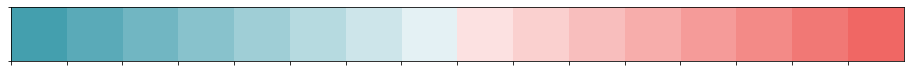

In [4]:
# Create diverging colormap for heatmaps
bnb_cmap = sns.diverging_palette(210,
                                 13,
                                 s=81,
                                 l=61,
                                 sep=3,
                                 n=16,
                                 as_cmap=True)

# Test colors
sns.palplot(sns.diverging_palette(210, 13, s=81, l=61, sep=3, n=16))

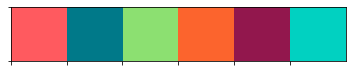

In [5]:
# Create color palette
bnb_palette = sns.color_palette(
    ["#FF5A5F", "#007989", "#8CE071", "#FC642D", "#92174D", "#01D1C1"])

# Test colors
sns.palplot(bnb_palette)

<a id='load-data'></a>
## Load the Data

We will look at the listings for the city of Los Angeles, CA

In [6]:
# Highest level listings information
lax_listings = pd.read_csv('data/Los_Angeles/listings.csv')
lax_listings.shape

(45053, 16)

<br>
There are 45053 listings in the dataset
<br>
<br>

In [7]:
# Looking at a sample observations
lax_listings.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11741,14387880,"Redondo Beach, Spanish-style Villa",88028644,Clifford,NaN,Torrance,33.81063,-118.38594,Entire home/apt,600,2,32,2019-09-02,0.86,1,307


In [8]:
lax_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45053 entries, 0 to 45052
Data columns (total 16 columns):
id                                45053 non-null int64
name                              45047 non-null object
host_id                           45053 non-null int64
host_name                         45037 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     45053 non-null object
latitude                          45053 non-null float64
longitude                         45053 non-null float64
room_type                         45053 non-null object
price                             45053 non-null int64
minimum_nights                    45053 non-null int64
number_of_reviews                 45053 non-null int64
last_review                       36534 non-null object
reviews_per_month                 36534 non-null float64
calculated_host_listings_count    45053 non-null int64
availability_365                  45053 non-null int64
dt

Most of the missing data is in the `last_review` field and the `reviews_per_month` field. We will investigate this when dealing with missing data
<br>
<br>

In [10]:
# Detailed listing information
lax_listings_detailed = pd.read_csv('data/Los_Angeles/listings_detailed.csv')

/anaconda3/envs/metis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# See which columns have null values
lax_listings_detailed.isna().sum().sort_values(ascending=False)[0:30]

xl_picture_url                  45053
neighbourhood_group_cleansed    45053
host_acceptance_rate            45053
thumbnail_url                   45053
medium_url                      45053
square_feet                     44731
license                         43021
monthly_price                   40739
weekly_price                    40356
notes                           22422
access                          18163
transit                         17420
interaction                     16098
host_about                      16080
neighborhood_overview           15153
house_rules                     13661
jurisdiction_names              12027
space                           11606
security_deposit                10906
review_scores_value              9133
review_scores_location           9125
review_scores_checkin            9120
review_scores_communication      9098
review_scores_cleanliness        9095
review_scores_accuracy           9095
review_scores_rating             9080
reviews_per_

There are quite a few columns with lots of null values. Some of these are optional text fields that the host may have chosen to leave empty.
<br>
Some columns are all null values, don't include these.
<br>
<br>

In [12]:
lax_listings_detailed.sample()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
33700,31878727,https://www.airbnb.com/rooms/31878727,20190914032935,2019-09-14,Enjoy a hidden gem in the heart of century city.,Come experience the laid back la life style in...,The whole condo is yours.,Come experience the laid back la life style in...,none,We are a 10 min walk from century city mall. ...,NaN,Uber or Lyft.,They have access to the full apt.,I’m available at all times.,- quiet hours after 9 pm House rules No shoes...,NaN,NaN,https://a0.muscache.com/im/pictures/2dfca6b0-0...,NaN,118694886,https://www.airbnb.com/users/show/118694886,Jannesa,2017-03-01,"Los Angeles, California, United States",Hello we are a young married active couple wit...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/dd513...,https://a0.muscache.com/im/pictures/user/dd513...,Westwood,1.0,1.0,"['email', 'phone', 'facebook']",t,f,"Los Angeles, CA, United States",Westwood,Westwood,NaN,Los Angeles,CA,90024,Los Angeles,"Los Angeles, CA",US,United States,34.05928,-118.42479,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,$200.00,NaN,NaN,$150.00,$35.00,2,$50.00,1,60,1,1,60,60,1.0,60.0,6 weeks ago,t,28,58,88,107,2019-09-14,7,7,2019-06-30,2019-08-23,86.0,9.0,9.0,10.0,9.0,9.0,9.0,t,NaN,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.73


## Target (Price) Distribution
Look at the distribution of the prices to get an idea of what the target that we are going to try to predict looks like

In [13]:
# Visualize price table, changing them to floats and replacing the commas with a blank
prices = lax_listings_detailed['price'].apply(lambda s: float(s[1:].replace(',','')))

# Drop listings with a price of zero
prices = prices[prices!=0]

# Log prices
log_prices = np.log(prices)

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


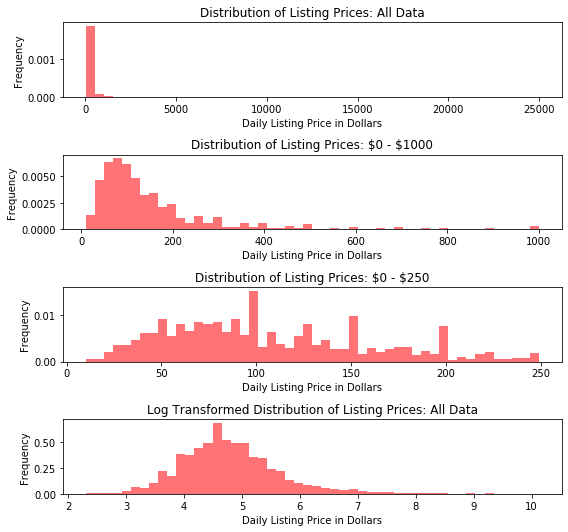

In [15]:
def plot_hist(n, titles, ranges):
    """
    Quick helper function to plot histograms
    """
    fig, ax = plt.subplots(n, figsize = (8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color= bnb_red, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot histograms of price distribution
plot_hist(4, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$250','Log Transformed Distribution of Listing Prices: All Data'], [prices, prices[prices <= 1000], prices[prices < 250],log_prices])


Despite the heavy left skew, log-transforming the prices almost completely normalizes the distribution

## Data Cleaning & Feature Engineering
There are a lot of columns in this dataset. We should only focus on cleaning those that we are interested in considering in the model to save some time. 
- Convert strings to relevant formats (float, datetime, etc)
- Impute or remove missing data
- Simplify categorical variables with tons of values

### Convert strings to datetime/float/etc

In [16]:
# Convert relevant columns to datetime format
lax_listings_detailed.last_scraped = pd.to_datetime(
    lax_listings_detailed.last_scraped)

lax_listings_detailed.calendar_last_scraped = pd.to_datetime(
    lax_listings_detailed.calendar_last_scraped)

lax_listings_detailed.first_review = pd.to_datetime(
    lax_listings_detailed.first_review)

lax_listings_detailed.last_review = pd.to_datetime(
    lax_listings_detailed.last_review)

lax_listings_detailed.host_since = pd.to_datetime(
    lax_listings_detailed.host_since)

In [17]:
# Convert strings to numbers
lax_listings_detailed.host_response_rate = lax_listings_detailed[
    'host_response_rate'].apply(lambda s: float(str(s).replace('%', '')))

lax_listings_detailed.security_deposit = lax_listings_detailed.security_deposit.str.replace(
    '$', '').str.replace(',', '').astype(float)

lax_listings_detailed.cleaning_fee = lax_listings_detailed.cleaning_fee.str.replace(
    '$', '').str.replace(',', '').astype(float)

### Categorical variables
**Clean up property types**
<br>
There are a lot of property types that only appear a couple of times and could be lumped in with other property types

In [18]:
lax_listings_detailed.property_type.value_counts()

Apartment                 16654
House                     15436
Condominium                2645
Guesthouse                 2349
Guest suite                1543
Townhouse                  1364
Bungalow                   1201
Villa                      1075
Loft                        945
Serviced apartment          279
Hostel                      257
Cottage                     197
Camper/RV                   169
Bed and breakfast           165
Other                       139
Boutique hotel              139
Tiny house                   95
Cabin                        67
Hotel                        60
Aparthotel                   54
Boat                         33
Farm stay                    27
Tent                         23
Castle                       17
Dome house                   16
Chalet                       15
Earth house                  14
Campsite                     12
Treehouse                    12
Barn                          9
Tipi                          8
Yurt    

In [19]:
# Treehouse and others that are most similar to Bungalow
lax_listings_detailed.replace('Treehouse','Bungalow',inplace=True)
lax_listings_detailed.replace('Cabin','Bungalow',inplace=True)
lax_listings_detailed.replace('Dome house','Bungalow',inplace=True)
lax_listings_detailed.replace('Earth house','Bungalow',inplace=True)
lax_listings_detailed.replace('Hut','Bungalow',inplace=True)
lax_listings_detailed.replace('Yurt','Bungalow',inplace=True)
lax_listings_detailed.replace('Tiny house','Bungalow',inplace=True)


# Boutique hotel, resort most like a hotel
lax_listings_detailed.replace('Boutique hotel','Hotel',inplace=True)
lax_listings_detailed.replace('Resort','Hotel',inplace=True)
lax_listings_detailed.replace('Aparthotel','Hotel',inplace=True)

# Farm stay to Bed and breakfast
lax_listings_detailed.replace('Farm stay','Bed and breakfast',inplace=True)

# Castle, Yurt, Tent, Hostel and Chalet to other
lax_listings_detailed.replace('Minsu (Taiwan)','Other',inplace=True)
lax_listings_detailed.replace('Vacation home','Other',inplace=True)
lax_listings_detailed.replace('Cave','Other',inplace=True)
lax_listings_detailed.replace('Igloo','Other',inplace=True)
lax_listings_detailed.replace('Pension (South Korea)','Other',inplace=True)
lax_listings_detailed.replace('Train','Other',inplace=True)
lax_listings_detailed.replace('Houseboat','Other',inplace=True)
lax_listings_detailed.replace('Bus','Other',inplace=True)
lax_listings_detailed.replace('Island','Other',inplace=True)
lax_listings_detailed.replace('Casa particular (Cuba)','Other',inplace=True)
lax_listings_detailed.replace('Dome','Other',inplace=True)
lax_listings_detailed.replace('Tipi','Other',inplace=True)
lax_listings_detailed.replace('Barn','Other',inplace=True)
lax_listings_detailed.replace('Campsite','Other',inplace=True)
lax_listings_detailed.replace('Castle','Other',inplace=True)
lax_listings_detailed.replace('Chalet','Other',inplace=True)
lax_listings_detailed.replace('Tent','Other',inplace=True)
lax_listings_detailed.replace('Farm stay','Other',inplace=True)
lax_listings_detailed.replace('Boat','Other',inplace=True)
lax_listings_detailed.replace('Dorm','Other',inplace=True)

In [20]:
lax_listings_detailed.property_type.value_counts()

Apartment             16654
House                 15436
Condominium            2645
Guesthouse             2349
Guest suite            1543
Bungalow               1415
Townhouse              1364
Villa                  1075
Loft                    945
Serviced apartment      279
Other                   278
Hostel                  257
Hotel                   255
Cottage                 197
Bed and breakfast       192
Camper/RV               169
Name: property_type, dtype: int64

**Before doing any text analysis**, create indicator features for potentially important text fields that hosts can fill out optionally

In [21]:
lax_listings_detailed['transit_bin'] = [
    0 if x else 1 for x in lax_listings_detailed.transit.isna()
]
lax_listings_detailed.transit_bin.value_counts()

1    27633
0    17420
Name: transit_bin, dtype: int64

In [22]:
lax_listings_detailed['house_rules_bin'] = [
    0 if x else 1 for x in lax_listings_detailed.house_rules.isna()
]
lax_listings_detailed.house_rules_bin.value_counts()

1    31392
0    13661
Name: house_rules_bin, dtype: int64

**Categorical Variables** that are ordinal are put into a numerical scale, binary are put into binary variables, and others are one-hot encoded

In [23]:
# Host Response Time
# We will treat nan values as 

lax_listings_detailed[
    'host_response_time_num'] = lax_listings_detailed.host_response_time.map({
        'within an hour':
        1,
        'within a few hours':
        2,
        'within a day':
        3,
        'a few days or more':
        4,
        np.nan:
        5
    })

In [24]:
# Cancellation Policy

lax_listings_detailed[
    'cancellation_policy_num'] = lax_listings_detailed.cancellation_policy.map({
        'flexible':
        1,
        'moderate':
        2,
        'strict':
        3,
        'strict_14_with_grace_period':
        4,
        'super_strict_30':
        5,
        'super_strict_60':
        6
    })

In [25]:
# Superhost

lax_listings_detailed['host_is_superhost'] = [
    1 if x == 't' else 0 for x in lax_listings_detailed.host_is_superhost
]

In [26]:
# Instant Bookable
lax_listings_detailed['instant_bookable'] = [
    1 if x == 't' else 0 for x in lax_listings_detailed.instant_bookable
]

In [27]:
# Requires Guest Profile Picture
lax_listings_detailed['require_guest_profile_picture'] = [
    1 if x == 't' else 0 for x in lax_listings_detailed.require_guest_profile_picture
]

In [28]:
# Requires Guest Phone Verification
lax_listings_detailed['require_guest_phone_verification'] = [
    1 if x == 't' else 0 for x in lax_listings_detailed.require_guest_phone_verification
]

In [29]:
# Create a column for number of amenities (figure out specific amenity importances later)
lax_listings_detailed['amenities_num'] = [len(x) for x in lax_listings_detailed.amenities.str.split(',')]

In [30]:
# Property Type
# One hot encode
prop_type_dummies = pd.get_dummies(lax_listings_detailed.property_type,
                                   prefix='prop')

# Drop "other" column as base case
del prop_type_dummies['prop_Other']

# Merge with df
lax_listings_detailed = lax_listings_detailed.merge(prop_type_dummies,
                                                    left_index=True,
                                                    right_index=True)

In [31]:
lax_listings_detailed.room_type.value_counts()

Entire home/apt    28468
Private room       14410
Shared room         1769
Hotel room           406
Name: room_type, dtype: int64

In [32]:
# Room Type
# Create numerical column for room type
lax_listings_detailed['room_type_num'] = lax_listings_detailed.room_type.map({
    'Entire home/apt':
    4,
    'Private room':
    3,
    'Hotel room':
    2,
    'Shared room':
    1
})

# One hot encode
room_type_dummies = pd.get_dummies(lax_listings_detailed.room_type,
                                   prefix='room')

# Drop "hotel room" column as base case
del room_type_dummies['room_Hotel room']

# Merge with df
lax_listings_detailed = lax_listings_detailed.merge(room_type_dummies,
                                                    left_index=True,
                                                    right_index=True)

In [33]:
# Bed Type
# One hot encode
bed_type_dummies = pd.get_dummies(lax_listings_detailed.bed_type,
                                   prefix='bed')

# Drop "Real bed" column as base case
del bed_type_dummies['bed_Real Bed']

# # Merge with df
lax_listings_detailed = lax_listings_detailed.merge(bed_type_dummies,
                                                    left_index=True,
                                                    right_index=True)

In [34]:
# Neighbourhood
# Fill nan's with "Other"
lax_listings_detailed.neighbourhood.fillna('Other',inplace=True)
lax_listings_detailed.neighbourhood.value_counts()[0:30]

Hollywood                       4130
Mid-Wilshire                    3739
Venice                          2333
Other                           2260
Long Beach                      1725
Downtown                        1688
West Hollywood                  1279
South LA                        1199
Santa Monica                    1168
Westlake                         983
Echo Park                        953
Silver Lake                      733
North Hollywood                  716
Westwood                         696
Mar Vista                        634
West Los Angeles                 626
Westchester/Playa Del Rey        617
Marina Del Rey                   614
Pasadena                         607
Bel Air/Beverly Crest            595
Beverly Hills                    587
Glendale                         551
South Robertson                  537
Hollywood Hills                  498
Sherman Oaks                     471
Woodland Hills/Warner Center     450
Studio City                      427
M

In [35]:
# Put listings with less than 200 listings into an "Other" column
top_neighbourhoods = lax_listings_detailed.groupby('neighbourhood').size() > 200

lax_listings_detailed[
    'neighbourhood_compressed'] = lax_listings_detailed.neighbourhood.apply(
        lambda x: x if top_neighbourhoods[x] else 'Other')

In [36]:
# Neighbourhood
# One hot encode
n_type_dummies = pd.get_dummies(lax_listings_detailed.neighbourhood_compressed,
                                   prefix='neigh')

# Drop "Other" column as base case
del n_type_dummies['neigh_Other']

# # Merge with df
lax_listings_detailed = lax_listings_detailed.merge(n_type_dummies,
                                                    left_index=True,
                                                    right_index=True)

### Adding Features: Amenities
Rather than simply counting the number of features, investigate which features have the greatest influence on price

In [37]:
# Format amenities column for analysis
lax_listings_detailed.amenities = lax_listings_detailed.amenities.apply(
    lambda x: re.sub('[^a-zA-Z,\/\s\d-]*', '', x).split(sep=','))

In [38]:
# Create list with all amenities
lax_listings_detailed.amenities

0        [TV, Cable TV, Internet, Wifi, Air conditionin...
1        [TV, Cable TV, Internet, Wifi, Air conditionin...
2        [Internet, Wifi, Air conditioning, Wheelchair ...
3        [Internet, Wifi, Kitchen, Heating, Washer, Dry...
4        [TV, Cable TV, Internet, Wifi, Air conditionin...
                               ...                        
45048    [TV, Wifi, Air conditioning, Heating, Smoke de...
45049    [TV, Wifi, Air conditioning, Kitchen, Free par...
45050    [TV, Wifi, Air conditioning, Kitchen, Free par...
45051    [TV, Wifi, Air conditioning, Kitchen, Pets all...
45052    [TV, Wifi, Air conditioning, Kitchen, Washer, ...
Name: amenities, Length: 45053, dtype: object

In [39]:
# Create flat list of all amenities entries
amenities_list = [item for sublist in lax_listings_detailed.amenities for item in sublist]

In [40]:
# Add up amenity counts
amenity_counts = Counter(amenities_list).most_common()

In [41]:
# See what these look like, look at the first 20
amenity_counts[0:20]

[('Wifi', 43963),
 ('Essentials', 42857),
 ('Smoke detector', 41690),
 ('Kitchen', 39936),
 ('Heating', 39722),
 ('Hangers', 38413),
 ('Shampoo', 36330),
 ('TV', 36261),
 ('Carbon monoxide detector', 35082),
 ('Air conditioning', 34592),
 ('Hair dryer', 34446),
 ('Washer', 34222),
 ('Dryer', 33772),
 ('Laptop friendly workspace', 33703),
 ('Iron', 32675),
 ('Hot water', 28184),
 ('Free parking on premises', 27133),
 ('Fire extinguisher', 24195),
 ('Refrigerator', 21047),
 ('First aid kit', 21044)]

There are a lot of amenities that only come up a few times. We are only interested in the more commonly listed amenities. First we will try looking at amenities that appear in more than 2.5% of listings

In [42]:
# Make a list of amenities of interest
amenities_of_interest = [x[0] for x in amenity_counts[0:70]]

In [43]:
# Remove unnecessary ones
amenities_of_interest.remove('Other')
amenities_of_interest.remove('translation missing enhostingamenity49')
amenities_of_interest.remove('translation missing enhostingamenity50')

print(amenities_of_interest)

['Wifi', 'Essentials', 'Smoke detector', 'Kitchen', 'Heating', 'Hangers', 'Shampoo', 'TV', 'Carbon monoxide detector', 'Air conditioning', 'Hair dryer', 'Washer', 'Dryer', 'Laptop friendly workspace', 'Iron', 'Hot water', 'Free parking on premises', 'Fire extinguisher', 'Refrigerator', 'First aid kit', 'Dishes and silverware', 'Lock on bedroom door', 'Microwave', 'Bed linens', 'Free street parking', 'Coffee maker', 'Private entrance', 'Stove', 'Cooking basics', 'Oven', 'Self check-in', 'No stairs or steps to enter', 'Long term stays allowed', 'Extra pillows and blankets', 'Family/kid friendly', 'Cable TV', 'Patio or balcony', 'Dishwasher', 'Internet', 'Pool', 'Luggage dropoff allowed', 'Indoor fireplace', 'Garden or backyard', 'Elevator', 'Pets allowed', 'Hot tub', 'Lockbox', 'Host greets you', 'BBQ grill', 'Private living room', 'Gym', 'Single level home', 'Bathtub', 'Keypad', 'Safety card', 'Well-lit path to entrance', 'Breakfast', '24-hour check-in', 'Pets live on this property', 'W

In [44]:
amenities_cols = []
amenities_col_names = []
for amenity in amenities_of_interest:
    amenities_cols.append([1 if x==True else 0 for x in lax_listings_detailed.amenities.apply(lambda x: amenity in x)])
    amenities_col_names.append(('amen_'+amenity))

In [45]:
# Create dummy variable columns
amenity_columns = pd.DataFrame(amenities_cols).transpose()
amenity_columns.columns=amenities_col_names
amenity_columns.index=lax_listings_detailed.index

In [46]:
# Split into amenity groups
kitchen_amenities = [
    'Kitchen', 'Refrigerator', 'Dishes and silverware', 'Microwave',
    'Coffee maker', 'Stove', 'Cooking basics', 'Oven', 'Dishwasher',
    'BBQ grill', 'Breakfast'
]
cleaning_amenities = [
    'Shampoo', 'Hair dryer', 'Washer', 'Dryer', 'Iron', 'Hot water', 'Bathtub'
]
safety_amenities = [
    'Smoke detector', 'Carbon monoxide detector', 'Fire extinguisher',
    'First aid kit', 'Lock on bedroom door', 'Lockbox', 'Keypad',
    'Safety card', 'Smart lock'
]
household_amenities = [
    'Heating', 'Air conditioning', 'Laptop friendly workspace',
    'Free parking on premises', 'Free street parking', 'Private entrance',
    'Self check-in', 'No stairs or steps to enter', 'Long term stays allowed',
    'Family/kid friendly', 'Luggage dropoff allowed', 'Indoor fireplace',
    'Elevator', 'Pets allowed', 'Host greets you', 'Single level home',
    'Well-lit path to entrance', '24-hour check-in',
    'Pets live on this property', 'Wide entrance for guests',
    'Extra space around bed', 'Smoking allowed', 'Wide hallways',
    'Wide entrance', 'Room-darkening shades', 'Flat path to guest entrance',
    'Wide entryway'
]
bedroom_amenities = ['Hangers', 'Bed linens', 'Extra pillows and blankets']
electronics_amenities = [
    'Wifi', 'TV', 'Cable TV', 'Internet', 'Ethernet connection'
]
extra_spaces_amenities = [
    'Patio or balcony', 'Pool', 'Garden or backyard', 'Hot tub', 'BBQ grill',
    'Private living room', 'Gym'
]

amenity_groups = [
    kitchen_amenities, cleaning_amenities, safety_amenities,
    household_amenities, bedroom_amenities, electronics_amenities,
    extra_spaces_amenities
]

In [49]:
# Get counts for # of amenities within each category for each listing
amenity_group_cols = []
for group in amenity_groups:
    amenity_group_cols.append(lax_listings_detailed.amenities.apply(
    lambda x: len(set(group).intersection(set(x)))))

In [50]:
amenity_group_columns = pd.DataFrame(amenity_group_cols).transpose()
amenity_group_columns.index = lax_listings_detailed.index
amenity_group_columns.columns = [
    'amen_group_kitchen', 'amen_group_cleaning', 'amen_group_safety',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_electronics',
    'amen_group_extra_spaces'
]

In [51]:
# Merge into main df
lax_listings_detailed = lax_listings_detailed.merge(amenity_group_columns,how='left',left_index=True,right_index=True)

**Time-based** features that can be represented as a timedelta (number of days since)

In [53]:
lax_listings_detailed['host_since_num'] = [
    (dt.datetime.today() - x).days for x in lax_listings_detailed.host_since
]

### Missing Data

**Missing values**: some columns only have a couple of null values - we will disregard these

In [54]:
lax_listings_detailed.dropna(subset=['bedrooms','beds','host_since_num'],inplace=True)

In [55]:
# Host Response Rate
# Fill with zero, assume they don't respond to guests very well
lax_listings_detailed.host_response_rate.fillna(0,inplace=True)

In [56]:
# Security Deposit
# Assume zero security deposit
lax_listings_detailed.security_deposit.fillna(0,inplace=True)

In [57]:
# Cleaning fee
# Assume zero cleaning fee
lax_listings_detailed.cleaning_fee.fillna(0,inplace=True)

/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


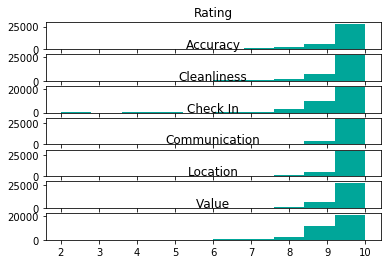

In [58]:
# Look at ratings distributions
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1)

ax1.hist(lax_listings_detailed.review_scores_rating,color=bnb_blue)
ax1.set_title('Rating')
ax2.hist(lax_listings_detailed.review_scores_accuracy,color=bnb_blue)
ax2.set_title('Accuracy')
ax3.hist(lax_listings_detailed.review_scores_cleanliness,color=bnb_blue)
ax3.set_title('Cleanliness')
ax4.hist(lax_listings_detailed.review_scores_checkin,color=bnb_blue)
ax4.set_title('Check In')
ax5.hist(lax_listings_detailed.review_scores_communication,color=bnb_blue)
ax5.set_title('Communication')
ax6.hist(lax_listings_detailed.review_scores_location,color=bnb_blue)
ax6.set_title('Location')
ax7.hist(lax_listings_detailed.review_scores_value,color=bnb_blue)
ax7.set_title('Value');

In [59]:
# Review Scores are all skewed left. Use median to fill null values

lax_listings_detailed.review_scores_rating.fillna(
    lax_listings_detailed.review_scores_rating.median(),inplace=True)

lax_listings_detailed.review_scores_accuracy.fillna(
    lax_listings_detailed.review_scores_accuracy.median(),inplace=True)

lax_listings_detailed.review_scores_cleanliness.fillna(
    lax_listings_detailed.review_scores_cleanliness.median(),inplace=True)

lax_listings_detailed.review_scores_checkin.fillna(
    lax_listings_detailed.review_scores_checkin.median(),inplace=True)

lax_listings_detailed.review_scores_communication.fillna(
    lax_listings_detailed.review_scores_communication.median(),inplace=True)

lax_listings_detailed.review_scores_location.fillna(
    lax_listings_detailed.review_scores_location.median(),inplace=True)

lax_listings_detailed.review_scores_value.fillna(
    lax_listings_detailed.review_scores_value.median(),inplace=True)

### Outliers
We will look at columns that we expect to be most influential on the model. Since our goal is to best serve the "typical" host, we may choose to exclude extreme cases from the model. This is also to check for incorrect data entries (i.e. a house listed with 1 bedroom but 10 bathrooms was probably a typo)

In [60]:
def findOutliers(df, column, lim_scalar=4):
    """
    Returns outliers above the max limit for a column in a dataframe
    Adjust outlier cutoff to q75 + 4*iqr to include more data
    ---
    input: DataFrame, column(series),lim_scalar(float)
    output: DataFrame
    """
    q25, q50, q75 = df[column].quantile(q=[0.25, 0.5, 0.75])
    iqr = q75 - q25
    # max limits to be considered an outlier
    max_ = q75 + lim_scalar * iqr
    # identify the points
    outlier_mask = [True if x > max_ else False for x in df[column]]
    print('{} outliers found out of {} data points, {}% of the data. {} is the max'.format(
        sum(outlier_mask), len(df[column]),
        100 * (sum(outlier_mask) / len(df[column])),max_))
    return outlier_mask

In [61]:
# Bathrooms
# Fill na with 1
lax_listings_detailed.bathrooms.fillna(1,inplace=True)

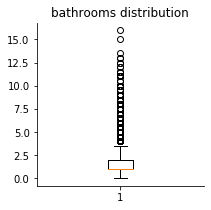

In [62]:
# Look at the distribution of the bathrooms column
plt.figure(figsize=(3,3))
plt.boxplot(lax_listings_detailed.bathrooms)
sns.despine()
plt.title('bathrooms distribution');

The distribution of bathrooms is skewed to the right. There is an obvious outlier at 16 bathrooms. Upon further investigation this may be a typo as this residence only has 1 bedroom. We will look at other important numerical columns for outliers as well

In [63]:
# Remove bathroom outliers
lax_listings_detailed_cleaned = lax_listings_detailed[np.logical_not(
    findOutliers(lax_listings_detailed, 'bathrooms'))]

289 outliers found out of 44925 data points, 0.6432943795214247% of the data. 6.0 is the max


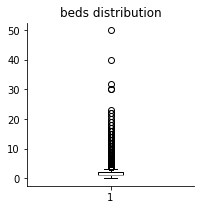

In [64]:
# Look at the distribution of the beds column
plt.figure(figsize=(3,3))
plt.boxplot(lax_listings_detailed.beds)
sns.despine()
plt.title('beds distribution');

In [65]:
# Remove bedroom outliers
lax_listings_detailed_cleaned = lax_listings_detailed_cleaned[np.logical_not(
    findOutliers(lax_listings_detailed_cleaned, 'beds',lim_scalar=6))]

315 outliers found out of 44636 data points, 0.7057083968097501% of the data. 8.0 is the max


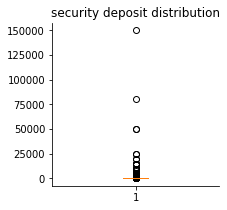

In [66]:
# Look at the distribution of the security deposit column
plt.figure(figsize=(3,3))
plt.boxplot(lax_listings_detailed_cleaned.security_deposit)
sns.despine()
plt.title('security deposit distribution');

In [67]:
# Remove security deposit outliers
lax_listings_detailed_cleaned = lax_listings_detailed_cleaned[np.logical_not(
    findOutliers(lax_listings_detailed_cleaned, 'security_deposit',lim_scalar=6))]

1034 outliers found out of 44321 data points, 2.332979851537646% of the data. 2100.0 is the max


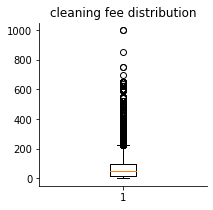

In [68]:
# Look at the distribution of the cleaning fee column
plt.figure(figsize=(3,3))
plt.boxplot(lax_listings_detailed_cleaned.cleaning_fee)
sns.despine()
plt.title('cleaning fee distribution');

In [69]:
# Remove security deposit outliers
lax_listings_detailed_cleaned = lax_listings_detailed_cleaned[np.logical_not(
    findOutliers(lax_listings_detailed_cleaned, 'cleaning_fee',lim_scalar=5))]

78 outliers found out of 43287 data points, 0.1801926675445284% of the data. 510.0 is the max


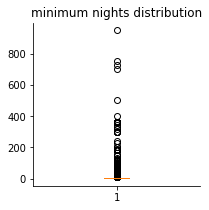

In [70]:
# Look at the distribution of the minimum nights column
plt.figure(figsize=(3,3))
plt.boxplot(lax_listings_detailed_cleaned.minimum_nights)
sns.despine()
plt.title('minimum nights distribution');

In [71]:
# Remove minimum nights outliers
lax_listings_detailed_cleaned = lax_listings_detailed_cleaned[np.logical_not(
    findOutliers(lax_listings_detailed_cleaned, 'minimum_nights',lim_scalar=14))]

447 outliers found out of 43209 data points, 1.034506699993057% of the data. 31.0 is the max


We want to keep listings that have a minimum of 1 month


## Calculate Occupancy Rate

**Occupancy Rate** will be an important consideration in determining which listings are priced well to train the model. What should be considered a "good" occupancy rate will most likely vary from place to place. This might be a function of neighborhood, city, unit size, or some other feature though. Let's calculate occupancy rate and see how these vary with some of these features

To calculate occupancy rate, we will assume a 50% review rate based on some considerations taken by [Inside Airbnb](http://insideairbnb.com/about.html). We will use this to estimate booked nights per year from the `reviews_per_month` column. Finally, to calculate occupancy rate we will divide this number by the total number of available nights in the year.
For now we will disregard those with rates higher than 1, as these are units with no present availability (roughly a quarter of the data falls into this group)

(Alternate method: use the number of reviews in the last 12 months to calculate)

(Alternate method: First we will calculate the estimated number of bookings for a listing as 2x the number of reviews. From this, we will calculate the estimated number of booked nights per year using an approach similar to the one described by Inside Airbnb. Finally, to calculate occupancy rate we will divide this number by the total number of available nights in the year)

In [ ]:
# Calculate estimated number of bookings
lax_listings_detailed_cleaned[
    'est_bookings'] = lax_listings_detailed_cleaned.number_of_reviews * 2

# Replace entries where unit is brand new with est_bookings = 1
lax_listings_detailed_cleaned['est_bookings'] = [
    1 if lax_listings_detailed_cleaned.first_review[idx] ==
    lax_listings_detailed_cleaned.last_review[idx] else x
    for idx, x in enumerate(lax_listings_detailed_cleaned.est_bookings)
]

In [881]:
# Calculate estimated number of nights booked per year
# Use 3 days as the average length of a stay
# Unless the minimum number of days is greater than 3, then use that number

lax_listings_detailed_cleaned['est_booked_nights_per_year'] = [
    3 if x < 3 else x
    for x in lax_listings_detailed_cleaned.minimum_nights  # avg stay length
] * lax_listings_detailed_cleaned.reviews_per_month * 2 * 12

In [882]:
# Calculate estimated number of nights booked
# Use 3 days as the average length of a stay
# Unless the minimum number of days is greater than 3, then use that number

lax_listings_detailed_cleaned['est_booked_nights'] = (
    [
        3 if x < 3 else x
        for x in lax_listings_detailed_cleaned.minimum_minimum_nights
    ] *  # avg stay length
    lax_listings_detailed_cleaned['est_bookings'])

In [883]:
# Occupancy Rate = total_booked_nights / total_available_nights
lax_listings_detailed_cleaned[
    'occupancy_rate'] = lax_listings_detailed_cleaned['est_booked_nights'] / (
        (lax_listings_detailed_cleaned.last_review -
         lax_listings_detailed_cleaned.first_review).dt.days + 1)

In [884]:
# Occupancy rate = booked_nights_per_year / yearly_availability
lax_listings_detailed_cleaned[
    'occupancy_rate2'] = lax_listings_detailed_cleaned[
        'est_booked_nights_per_year'] / (
            lax_listings_detailed_cleaned['availability_365'] + 1
        )  # add 1 to avoid div by zero

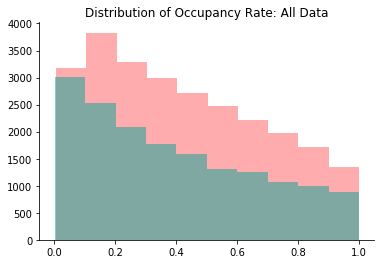

In [885]:
# Plot it

occ_rate = lax_listings_detailed_cleaned['occupancy_rate']
occ_rate2 = lax_listings_detailed_cleaned['occupancy_rate2']

# Plot histograms of occupancy rate distribution
plt.hist(occ_rate[occ_rate < 1], color=bnb_red, alpha=0.5)
sns.despine()
plt.title('Distribution of Occupancy Rate: All Data')
plt.hist(occ_rate2[occ_rate2 < 1], color=bnb_blue, alpha=0.5)

The shape of both approaches for calculating occupancy rate is roughly the same, both being skewed right. The 2nd approach has many more listings falling outside of the range 0 to 1

**Save**

In [935]:
# Save for later
with open('data/lax_listings_detailed_cleaned.pickle', 'wb') as to_write:
    pickle.dump(lax_listings_detailed_cleaned, to_write)

In [75]:
# # If starting from here, uncomment code
# # Load cleaned dataset
# with open('data/lax_listings_detailed_cleaned.pickle', 'rb') as to_read:
#     lax_listings_detailed_cleaned = pickle.load(to_read)

Next step is modeling with linear regression. See next notebook